#### Compare the prediction result among ecFactory vs FSEOF vs optForce

In [1]:
import os
import pandas as pd

# set workdir
os.chdir(r'D:\code\github\CellFactory-ecYeastGEM')

In [2]:
ecFactoryl3_path=r'results/spermine_targets.txt'
ecFactoryl2_path=r'results/production_targets/spermine_targets/candidates_L2.txt'
ecFactoryl1_path=r'results/production_targets/spermine_targets/candidates_L1.txt'
fseof_path=r'code/GEM_simulation/output/fseof_result.xlsx'
optforce_path=r'code/GEM_simulation/output/OptForce_r_2051_gene.csv'


df_ecFactoryl1=pd.read_csv(ecFactoryl1_path,sep='\t')
df_ecFactoryl2=pd.read_csv(ecFactoryl2_path,sep='\t')
df_ecFactoryl3=pd.read_csv(ecFactoryl3_path,sep='\t')
df_fseof=pd.read_excel(fseof_path,index_col=0)
df_optforce=pd.read_csv(optforce_path)

ecFactoryl1_dict={'KD':df_ecFactoryl1[df_ecFactoryl1['actions'].isin(['KD','KO'])]['genes'].tolist(),
                  'OE':df_ecFactoryl1[df_ecFactoryl1['actions'].isin(['OE'])]['genes'].tolist()}
ecFactoryl2_dict={'KD':df_ecFactoryl2[df_ecFactoryl2['actions'].isin(['KD','KO'])]['genes'].tolist(),
                    'OE':df_ecFactoryl2[df_ecFactoryl2['actions'].isin(['OE'])]['genes'].tolist()}
ecFactoryl3_dict={'KD':df_ecFactoryl3[df_ecFactoryl3['actions'].isin(['KD','KO'])]['genes'].tolist(),
                    'OE':df_ecFactoryl3[df_ecFactoryl3['actions'].isin(['OE'])]['genes'].tolist()}
fseof_dict={'KD':df_fseof[df_fseof['actions'].isin(['KD','KO'])]['gene'].tolist(),
            'OE':df_fseof[df_fseof['actions'].isin(['OE'])]['gene'].tolist()}
optforce_dict={'KD':df_optforce[df_optforce['target'].isin(['KD','KO'])]['geneID'].tolist(),
                'OE':df_optforce[df_optforce['target'].isin(['OE'])]['geneID'].tolist()}

In [3]:
# load experimental data
exp_data_path=r'data/spermidine_exp_targets.tsv'
df_exp=pd.read_csv(exp_data_path,sep='\t')

exp_dict={'KD':df_exp[df_exp['action'].isin(['KD','KO'])]['geneID'].tolist(),
            'OE':df_exp[df_exp['action'].isin(['OE'])]['geneID'].tolist()}

# save result to json
to_save_dict={'ecFactory_L1':ecFactoryl1_dict,'ecFactory_L2':ecFactoryl2_dict,'ecFactory_L3':ecFactoryl3_dict,
                'fseof':fseof_dict,'optforce':optforce_dict,'exp':exp_dict}
import json
with open(r'code/GEM_simulation/output/spermine_preiction_results.json','w') as f:
    json.dump(to_save_dict,f)

In [4]:
def calculate_exp_consistency(exp_dict,method_dict):
    result_dict={}
    KD_exp=exp_dict['KD']
    OE_exp=exp_dict['OE']
    KD_method=method_dict['KD']
    OE_method=method_dict['OE']
    kd_hits=list(set(KD_exp).intersection(KD_method))
    oe_hits=list(set(OE_exp).intersection(OE_method))
    KD_consistency=len(kd_hits)/len(KD_exp)
    OE_consistency=len(oe_hits)/len(OE_exp)
    total_consistency=len(kd_hits+oe_hits)/len(KD_exp+OE_exp)
    result_dict['KD_hits']=kd_hits
    result_dict['OE_hits']=oe_hits
    result_dict['KD_consistency']=KD_consistency
    result_dict['OE_consistency']=OE_consistency
    result_dict['total_consistency']=total_consistency
    print(result_dict)
    return result_dict

print('ecFacory_l1 result:')
ecFactoryl1_consistency=calculate_exp_consistency(exp_dict,ecFactoryl1_dict)
print('ecFacory_l2 result:')
ecFactoryl2_consistency=calculate_exp_consistency(exp_dict,ecFactoryl2_dict)
print('ecFacory_l3 result:')
ecFactoryl3_consistency=calculate_exp_consistency(exp_dict,ecFactoryl3_dict)
print('fseof result:')
fseof_consistency=calculate_exp_consistency(exp_dict,fseof_dict)
print('OptForce result:')
optforce_consistency=calculate_exp_consistency(exp_dict,optforce_dict)

ecFacory_l1 result:
{'KD_hits': ['YMR020W', 'YLR438W'], 'OE_hits': ['YOL052C', 'YPR069C', 'YKL184W', 'YLR017W', 'YOR375C', 'YPR021C', 'YOR130C'], 'KD_consistency': 0.2857142857142857, 'OE_consistency': 0.5833333333333334, 'total_consistency': 0.47368421052631576}
ecFacory_l2 result:
{'KD_hits': ['YMR020W', 'YLR438W'], 'OE_hits': ['YOL052C', 'YPR069C', 'YKL184W', 'YLR017W', 'YOR375C'], 'KD_consistency': 0.2857142857142857, 'OE_consistency': 0.4166666666666667, 'total_consistency': 0.3684210526315789}
ecFacory_l3 result:
{'KD_hits': ['YMR020W'], 'OE_hits': ['YOL052C', 'YPR069C', 'YKL184W', 'YLR017W', 'YOR375C'], 'KD_consistency': 0.14285714285714285, 'OE_consistency': 0.4166666666666667, 'total_consistency': 0.3157894736842105}
fseof result:
{'KD_hits': ['YLR438W'], 'OE_hits': ['YOL052C', 'YDR502C', 'YKL184W', 'YPR069C', 'YLR017W', 'YOR375C', 'YPR021C', 'YOL061W', 'YML022W', 'YOR130C'], 'KD_consistency': 0.14285714285714285, 'OE_consistency': 0.8333333333333334, 'total_consistency': 0.57

In [5]:
# ecFactory vs FSEOF
oe_specific=set(ecFactoryl1_consistency['OE_hits'])-set(fseof_consistency['OE_hits'])
kd_specific=set(ecFactoryl1_consistency['KD_hits'])-set(fseof_consistency['KD_hits'])
print(f'ecFactory vs FSEOF: OE special {oe_specific}, KD special {kd_specific}')

# ecFactory vs OptForce
oe_specific=set(ecFactoryl1_consistency['OE_hits'])-set(optforce_consistency['OE_hits'])
kd_specific=set(ecFactoryl1_consistency['KD_hits'])-set(optforce_consistency['KD_hits'])
print(f'ecFactory vs OptForce: OE special {oe_specific}, KD special {kd_specific}')

ecFactory vs FSEOF: OE special set(), KD special {'YMR020W'}
ecFactory vs OptForce: OE special {'YOR130C', 'YOR375C', 'YPR021C'}, KD special {'YMR020W', 'YLR438W'}


In [6]:
# compare the ratio of hit genes for total predicted genes
def calculate_accuracy(exp_dict,method_dict):
    KD_exp=exp_dict['KD']
    OE_exp=exp_dict['OE']
    KD_method=method_dict['KD']
    OE_method=method_dict['OE']
    kd_hits=list(set(KD_exp).intersection(KD_method))
    oe_hits=list(set(OE_exp).intersection(OE_method))
    total_hit=len(kd_hits+oe_hits)
    total_targets=len(KD_method+OE_method)
    accuracy=total_hit/total_targets
    return accuracy

ecFactoryl1_accuracy=calculate_accuracy(exp_dict,ecFactoryl1_dict)
print(f'ecFactoryl1 accuracy: {ecFactoryl1_accuracy}')
    
ecFactoryl2_accuracy=calculate_accuracy(exp_dict,ecFactoryl2_dict)
print(f'ecFactoryl2 accuracy: {ecFactoryl2_accuracy}')

ecFactoryl3_accuracy=calculate_accuracy(exp_dict,ecFactoryl3_dict)
print(f'ecFactoryl3 accuracy: {ecFactoryl3_accuracy}')

fseof_accuracy=calculate_accuracy(exp_dict,fseof_dict)
print(f'fseof accuracy: {fseof_accuracy}')

optforce_accuracy=calculate_accuracy(exp_dict,optforce_dict)
print(f'optforce accuracy: {optforce_accuracy}')

df_accuracy=pd.DataFrame({'method':['ecFactory L1','ecFactory L2','ecFactory L3','FSEOF','optForce'],
                          'accuracy':[ecFactoryl1_accuracy,ecFactoryl2_accuracy,ecFactoryl3_accuracy,fseof_accuracy,optforce_accuracy]})
df_accuracy=df_accuracy.sort_values('accuracy',ascending=True)
df_accuracy['targets number']=df_accuracy['method'].map({'ecFactory L1':len(ecFactoryl1_dict['KD']+ecFactoryl1_dict['OE']),
                                                        'ecFactory L2':len(ecFactoryl2_dict['KD']+ecFactoryl2_dict['OE']),
                                                        'ecFactory L3':len(ecFactoryl3_dict['KD']+ecFactoryl3_dict['OE']),
                                                        'FSEOF':len(fseof_dict['KD']+fseof_dict['OE']),
                                                        'optForce':len(optforce_dict['KD']+optforce_dict['OE'])})
df_accuracy['hit validated targets number']=df_accuracy['method'].map({'ecFactory L1':len(ecFactoryl1_consistency['KD_hits']+ecFactoryl1_consistency['OE_hits']),
                                                                        'ecFactory L2':len(ecFactoryl2_consistency['KD_hits']+ecFactoryl2_consistency['OE_hits']),
                                                                        'ecFactory L3':len(ecFactoryl3_consistency['KD_hits']+ecFactoryl3_consistency['OE_hits']),
                                                                        'FSEOF':len(fseof_consistency['KD_hits']+fseof_consistency['OE_hits']),
                                                                        'optForce':len(optforce_consistency['KD_hits']+optforce_consistency['OE_hits'])})

# save result
df_accuracy.to_csv(r'code/GEM_simulation/output/spermine_prediction_accuracy.csv',index=False)
df_accuracy

ecFactoryl1 accuracy: 0.11392405063291139
ecFactoryl2 accuracy: 0.16279069767441862
ecFactoryl3 accuracy: 0.20689655172413793
fseof accuracy: 0.10091743119266056
optforce accuracy: 0.04


,method,accuracy,targets number,hit validated targets number
4,optForce,0.040000,125,5
3,FSEOF,0.100917,109,11
0,ecFactory L1,0.113924,79,9
1,ecFactory L2,0.162791,43,7
2,ecFactory L3,0.206897,29,6


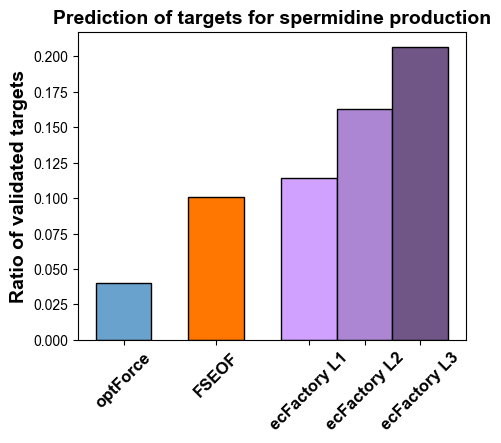

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# set font as Arial
plt.rcParams['font.sans-serif'] = ['Arial']

values = df_accuracy['accuracy'].tolist()
x_label=df_accuracy['method'].tolist()
bar_width = 0.6

x_positions = [0, 1, 2, 2.6, 3.2]  

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(x_positions, values, width=bar_width,color=['#69a2cd','#ff7700','#d1a1ff','#ad86d3','#6f5687'],edgecolor='black')

ax.set_xticks(x_positions)
ax.set_xticklabels(x_label,rotation=45,fontsize=12,fontweight='bold')

# 添加标签和标题
ax.set_xlabel('')
ax.set_ylabel('Ratio of validated targets',fontsize=14,fontweight='bold')
ax.set_title('Prediction of targets for spermidine production',fontsize=14,fontweight='bold')

plt.show()

In [37]:
# compare 2-PE prediction
df_fseof=pd.read_excel(r'code/GEM_simulation/output/fseof_result_2PE.xlsx')
df_ecFactory=pd.read_csv(r'results/production_targets/phenylethanol_targets/candidates_L3.txt',sep='\t')

fseof_dict={'KD':df_fseof[df_fseof['actions'].isin(['KD','KO'])]['gene'].tolist(),
            'OE':df_fseof[df_fseof['actions'].isin(['OE'])]['gene'].tolist()}
    
ecFactory_dict={'KD':df_ecFactory[df_ecFactory['actions'].isin(['KD','KO'])]['genes'].tolist(),
                'OE':df_ecFactory[df_ecFactory['actions'].isin(['OE'])]['genes'].tolist()}

df_exp=pd.read_csv(r'data/2-phenylethanol_exp_targets.tsv',sep='\t')

exp_dict={'KD':df_exp[df_exp['action'].isin(['KD','KO'])]['geneID'].tolist(),
            'OE':df_exp[df_exp['action'].isin(['OE'])]['geneID'].tolist()}

print('fseof:')
fseof_consistency=calculate_exp_consistency(exp_dict,fseof_dict)
print('ecFactory:')
ecFactory_consistency=calculate_exp_consistency(exp_dict,ecFactory_dict)


fseof:
{'KD_hits': [], 'OE_hits': ['YGL148W', 'YDR380W', 'YBR249C', 'YNL241C', 'YNL316C', 'YPR060C', 'YDR127W'], 'KD_consistency': 0.0, 'OE_consistency': 0.6363636363636364, 'total_consistency': 0.5833333333333334}
ecFactory:
{'KD_hits': [], 'OE_hits': ['YGL148W', 'YDR380W', 'YBR249C', 'YNL241C', 'YNL316C', 'YPR060C', 'YDR127W'], 'KD_consistency': 0.0, 'OE_consistency': 0.6363636363636364, 'total_consistency': 0.5833333333333334}
